# Session Utilisation



In [2]:
#%pip install plotnine  

In [3]:
import fastf1

# Suppress info messages
fastf1.set_log_level('ERROR')

fp1 = fastf1.get_session(2024, 'Bahrain', 'FP1')
fp1.load(laps=True)

In [9]:
fp1.laps

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,FreshTyre,Team,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate
0,0 days 00:23:29.480000,VER,1,NaT,1.0,1.0,0 days 00:21:31.781000,NaT,NaT,0 days 00:00:53.688000,...,True,Red Bull Racing,0 days 00:21:31.781000,2024-02-29 11:36:31.847,1,NaN,False,,False,False
1,0 days 00:25:03.380000,VER,1,0 days 00:01:33.900000,2.0,1.0,NaT,NaT,0 days 00:00:30.147000,0 days 00:00:40.365000,...,True,Red Bull Racing,0 days 00:23:29.480000,2024-02-29 11:38:29.546,1,NaN,False,,False,True
2,0 days 00:27:38.741000,VER,1,NaT,3.0,1.0,NaT,0 days 00:27:36.999000,0 days 00:00:51.006000,0 days 00:01:05.853000,...,True,Red Bull Racing,0 days 00:25:03.380000,2024-02-29 11:40:03.446,1,NaN,False,,False,False
3,0 days 00:30:09.791000,VER,1,NaT,4.0,2.0,0 days 00:28:03.285000,NaT,0 days 00:01:03.355000,0 days 00:00:54.264000,...,False,Red Bull Racing,0 days 00:27:38.741000,2024-02-29 11:42:38.807,1,NaN,False,,False,False
4,0 days 00:31:43.326000,VER,1,0 days 00:01:33.535000,5.0,2.0,NaT,NaT,0 days 00:00:29.959000,0 days 00:00:40.204000,...,False,Red Bull Racing,0 days 00:30:09.791000,2024-02-29 11:45:09.857,1,NaN,False,,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
444,0 days 01:13:18.191000,PIA,81,0 days 00:01:38.441000,21.0,3.0,NaT,NaT,0 days 00:00:31.599000,0 days 00:00:42.481000,...,False,McLaren,0 days 01:11:39.750000,2024-02-29 12:26:39.816,1,NaN,False,,False,True
445,0 days 01:14:56.712000,PIA,81,0 days 00:01:38.521000,22.0,3.0,NaT,NaT,0 days 00:00:31.560000,0 days 00:00:42.581000,...,False,McLaren,0 days 01:13:18.191000,2024-02-29 12:28:18.257,1,NaN,False,,False,True
446,0 days 01:16:35.365000,PIA,81,0 days 00:01:38.653000,23.0,3.0,NaT,NaT,0 days 00:00:31.683000,0 days 00:00:42.430000,...,False,McLaren,0 days 01:14:56.712000,2024-02-29 12:29:56.778,1,NaN,False,,False,True
447,0 days 01:18:47.934000,PIA,81,0 days 00:02:12.569000,24.0,3.0,NaT,NaT,0 days 00:00:36.175000,0 days 00:00:53.763000,...,False,McLaren,0 days 01:16:35.365000,2024-02-29 12:31:35.431,1,NaN,False,,False,True


In [33]:
fp1.laps.Compound.unique()

array(['MEDIUM', 'SOFT'], dtype=object)

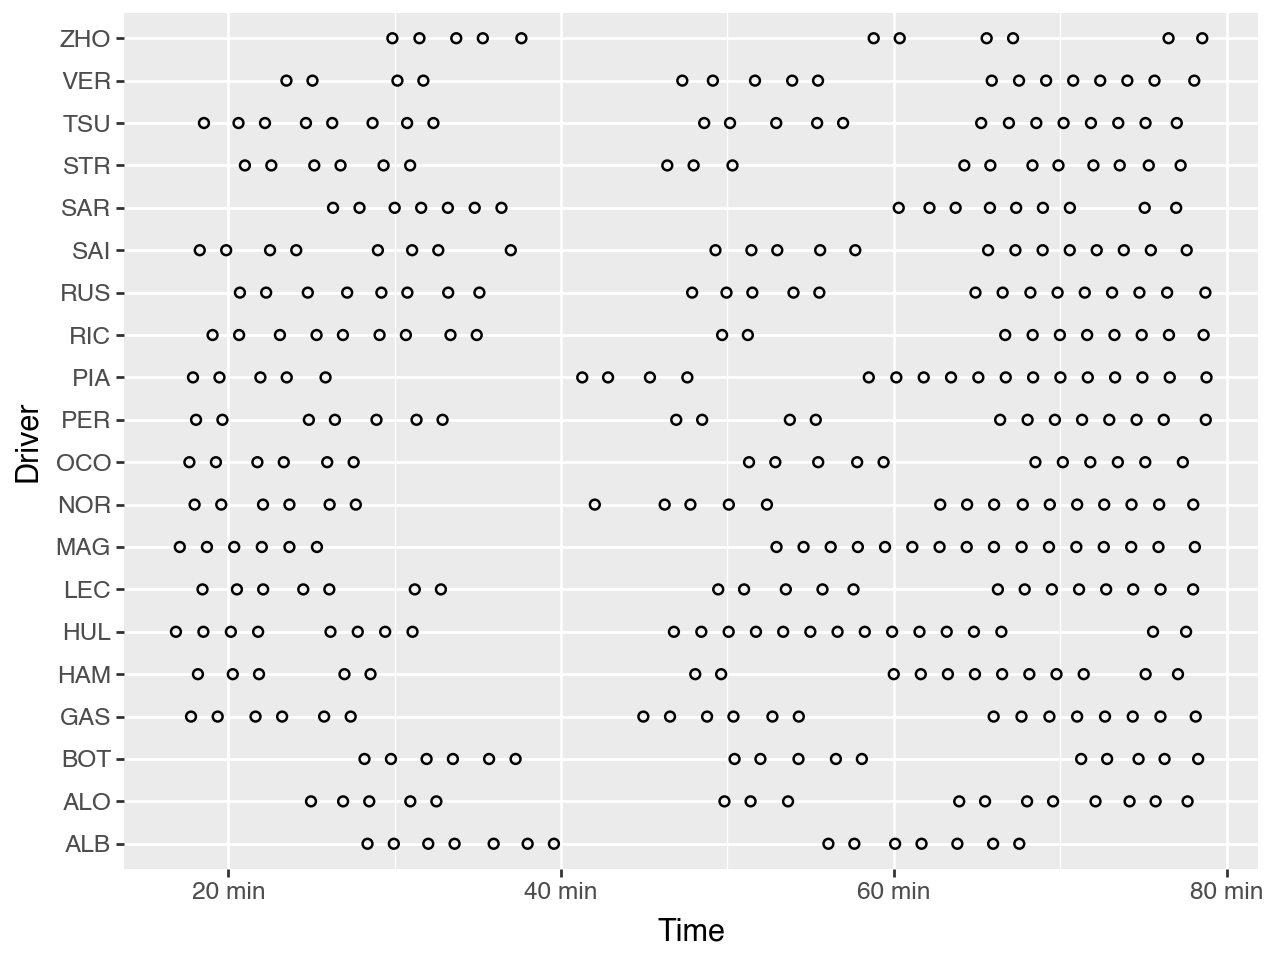

In [64]:
from plotnine import ggplot, geom_point, aes
(
    ggplot(fp1.laps[fp1.laps['PitInTime'].isna()], aes("Time", "Driver"))
            + geom_point(fill="none")
)

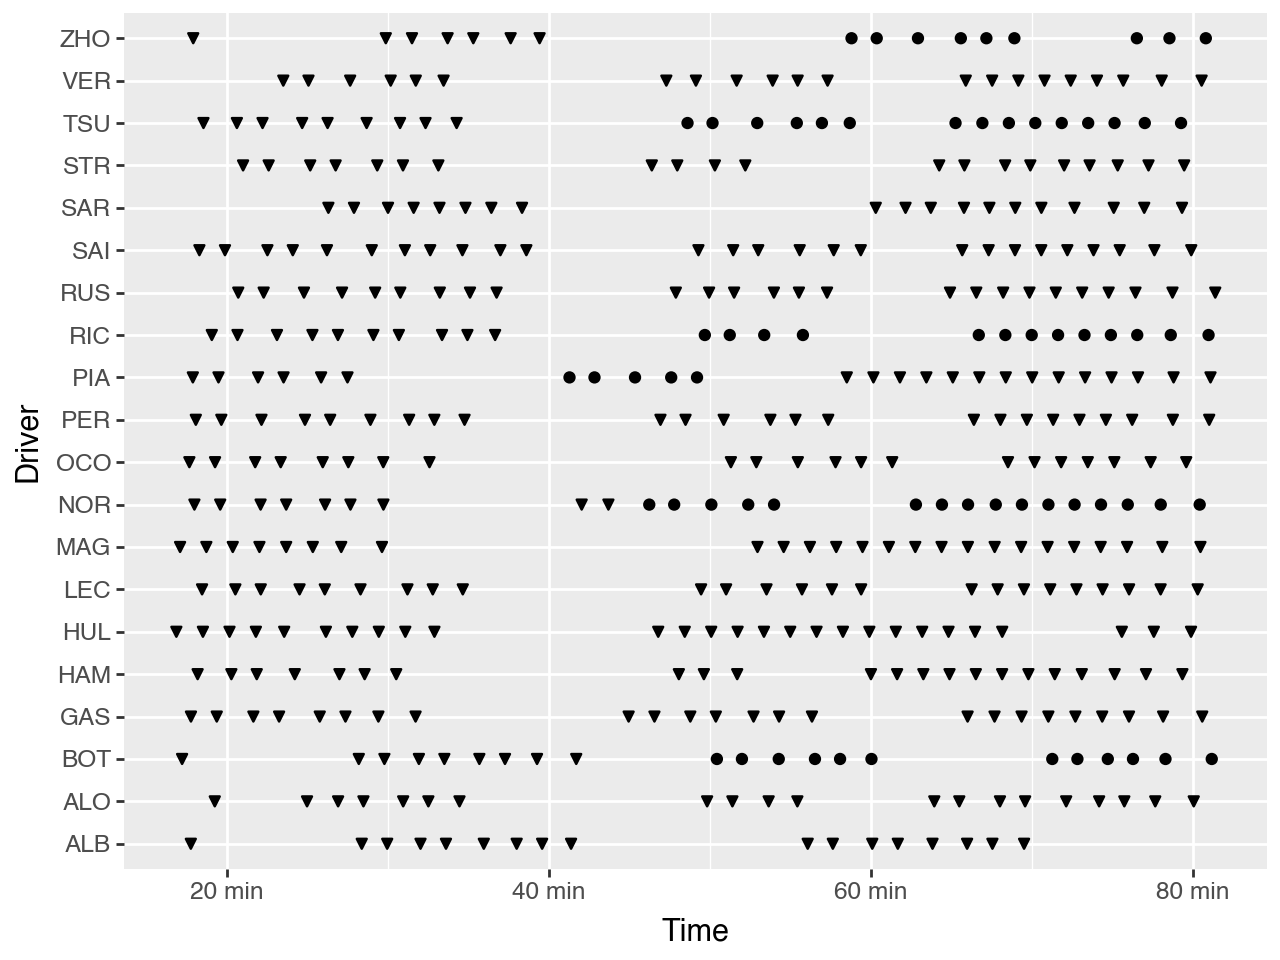

In [80]:
(
    ggplot(fp1.laps, aes("Time", "Driver"))
    +  geom_point(data=fp1.laps[(fp1.laps['Compound']=='MEDIUM')], shape="v")
    +  geom_point(data=fp1.laps[(fp1.laps['Compound']=='SOFT')])
)

In [22]:
def session_utilisation_chart(session):
    """
    Generate a session utilization chart for a given session.

    Parameters:
        session (object): A session object containing latpime data.

    Returns:
        plotnine.ggplot: The session utilization chart.
    """
    return (
        ggplot(session.laps, aes("Time", "Driver"))
        + geom_point(fill="none")
        + geom_point(data=session.laps[session.laps['PitInTime'].notna()])
    )

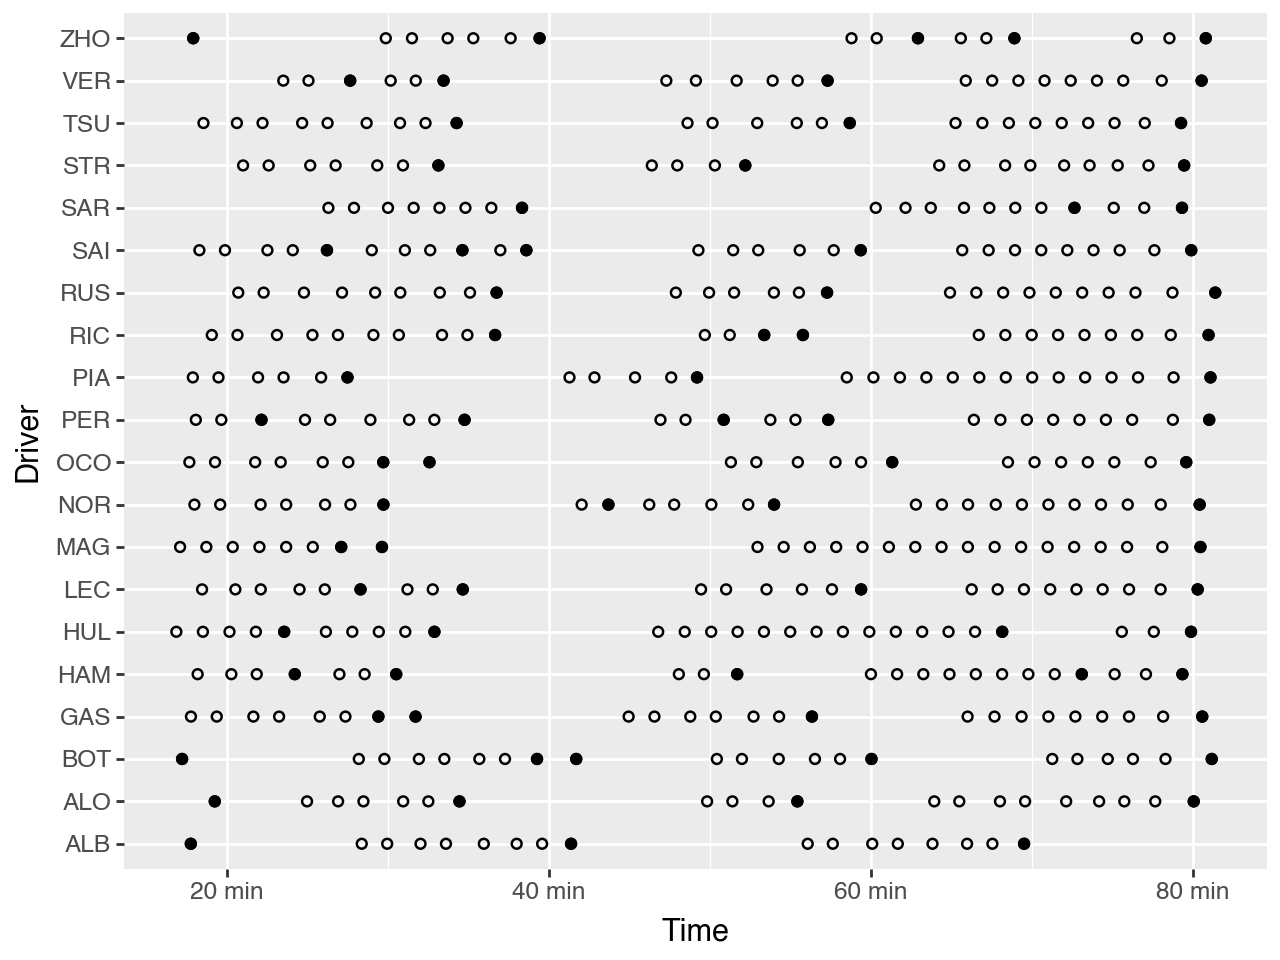

In [23]:
session_utilisation_chart(fp1)

In [31]:
from plotnine.scales.scale_shape import FILLED_SHAPES
FILLED_SHAPES

"""
o: circle
*: star
>: right pointing triangle
<: left pointing triangle
^: up pointing triangle
v: down pointing triangle
s: square
D: fat diamond
d: thin diamond
"""

{'*', '8', '<', '>', 'D', 'H', '^', 'd', 'h', 'o', 'p', 's', 'v'}

In [87]:
import numpy as np

# Sort DataFrame by eventTime
fp1.laps.sort_values(by='Time', inplace=True)
# Compute cumulative minimum on lapTime while treating NaNs as large values
fp1.laps['LapTimeS'] = fp1.laps['LapTime'].dt.total_seconds()
lap_times = fp1.laps['LapTimeS'].fillna(np.inf)
cumulative_min = lap_times.cummin()

# Set 'purple' flag where lapTime matches the cumulative minimum and is not null
fp1.laps['purple'] = (fp1.laps['LapTimeS'] == cumulative_min) & fp1.laps['LapTime'].notnull()


In [88]:
fp1.laps.head(3)

,Time,Driver,DriverNumber,LapTime,LapNumber,Stint,PitOutTime,PitInTime,Sector1Time,Sector2Time,...,LapStartTime,LapStartDate,TrackStatus,Position,Deleted,DeletedReason,FastF1Generated,IsAccurate,LapTimeS,purple
234,0 days 00:16:50.925000,HUL,27,NaT,1.0,1.0,0 days 00:15:03.718000,NaT,NaT,0 days 00:00:46.623000,...,0 days 00:15:03.718000,2024-02-29 11:30:03.784,1,NaN,False,,False,False,NaN,False
152,0 days 00:17:04.787000,MAG,20,NaT,1.0,1.0,0 days 00:15:17.042000,NaT,NaT,0 days 00:00:50.190000,...,0 days 00:15:17.042000,2024-02-29 11:30:17.108,1,NaN,False,,False,False,NaN,False
403,0 days 00:17:12.261000,BOT,77,NaT,1.0,1.0,0 days 00:15:05.587000,0 days 00:17:10.290000,NaT,0 days 00:00:52.435000,...,0 days 00:15:05.587000,2024-02-29 11:30:05.653,1,NaN,False,,False,False,NaN,False


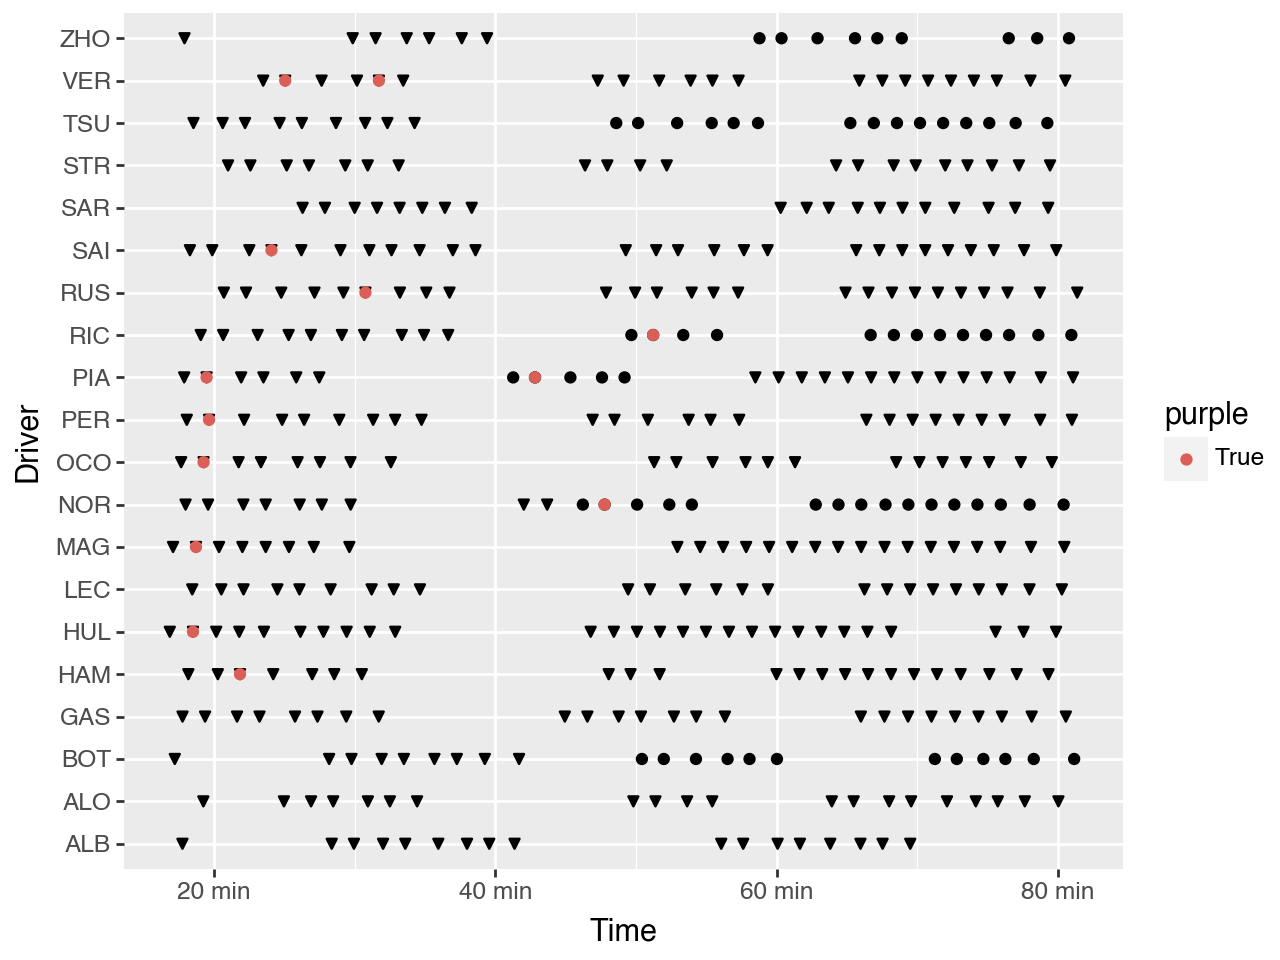

In [91]:
(
    ggplot(fp1.laps, aes("Time", "Driver"))
    +  geom_point(data=fp1.laps[(fp1.laps['Compound']=='MEDIUM')], shape="v")
    +  geom_point(data=fp1.laps[(fp1.laps['Compound']=='SOFT')])
    + geom_point(fp1.laps[(fp1.laps['purple'])], aes(color='purple'))
)